In [1]:
# %pip install pandas
# %pip install numpy
# %pip install sklearn
# %pip install matplotlib
# %pip install pyswarms
# %pip install plotly

In [2]:
from utils import GPR, mean_squared_error, visualize, generate_sample

import numpy as np
from tqdm import tqdm
import plotly.express as px

In [3]:
target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_train_data_points = 500
n_test_data_points = 10_000
n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

In [4]:
X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=1)
X_test,  y_test  = generate_sample(n_test_data_points, n_dims, lower_bound, upper_bound, target_func)

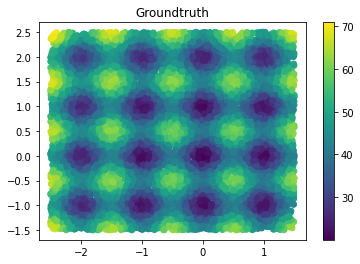

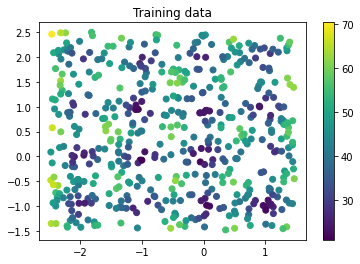

In [5]:
visualize(X_test, y_test, title='Groundtruth'), visualize(X_train, y_train, title='Training data');

In [6]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

kernel = ConstantKernel(1.0) * RBF(1.0)
args = {
    'c1': 0.5, 
    'c2': 0.3, 
    'w': 0.9,
    'n_optim_steps': 100,
    'n_particles': 20,
    'n_restarts_optimizer': 10,
    "n_dims": 2,
    "kernel": kernel
}

gpr = GPR(**args)

In [7]:
gpr.model.kernel.theta

array([0., 0.])

In [8]:
gpr.optimizer.dimensions

2

In [9]:
gpr = gpr.fit(X_train, y_train)

2022-07-20 14:46:10,451 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=2.5e+5 
2022-07-20 14:46:11,167 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 249753.43056935887, best pos: [-0.16726043 -2.19066603]
2022-07-20 14:46:11,168 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


249753.43056935887
[-0.16726043 -2.19066603]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.89e+4
2022-07-20 14:46:12,133 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 18858.382171931764, best pos: [ 2.53052831 -2.32317575]


18858.382171931764
[ 2.53052831 -2.32317575]


In [10]:
gpr.model.kernel.theta

array([0., 0.])

In [11]:
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

275.79562266808955

In [12]:
# dauert m 40s
gpr = gpr.hyper_optimize(X_train, y_train)
y_pred = gpr.predict(X_test)
mean_squared_error(y_test, y_pred)

AttributeError: 'GPR' object has no attribute 'kernel'

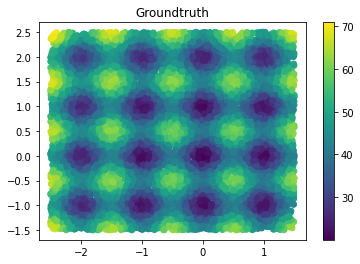

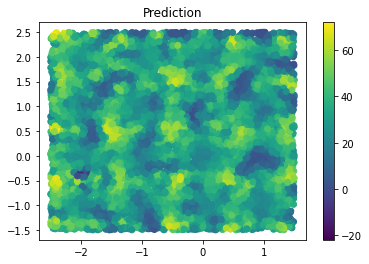

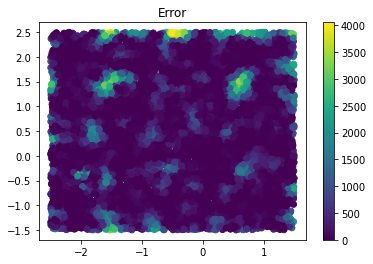

In [13]:
visualize(X_test, y_test, title="Groundtruth")
visualize(X_test, y_pred, title="Prediction")
visualize(X_test, (y_test-y_pred)**2, title="Error");

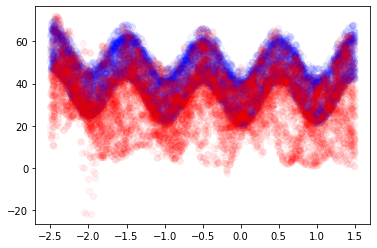

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X_test[0], target_func(X_test), label="Training data", color="blue", alpha=0.05)
plt.scatter(X_test[0], y_pred, label="Prediction", color="red", alpha=0.05);

In [15]:
n_data_points = [50, 250, 500, 750, 1000, 2000, 5000]
errors = []
for n in tqdm(n_data_points):
    X_train, y_train = generate_sample(n, n_dims, lower_bound, upper_bound, target_func, noise_scale=0)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train) 
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=n_data_points, y=errors, title='Error vs. Number of Data Points', log_y=True, trendline="lowess")

  0%|          | 0/7 [00:00<?, ?it/s]2022-07-20 14:46:32,262 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.84e+3
2022-07-20 14:46:32,352 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1835.4364217821787, best pos: [ 2.73106482 -0.9422595 ]
2022-07-20 14:46:32,353 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


1835.4364217821787
[ 2.73106482 -0.9422595 ]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=221
2022-07-20 14:46:32,450 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 221.27297568712768, best pos: [ 7.09284484 -0.7536236 ]
 14%|█▍        | 1/7 [00:00<00:01,  4.71it/s]2022-07-20 14:46:32,474 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


221.27297568712768
[ 7.09284484 -0.7536236 ]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=4.24e+4
2022-07-20 14:46:32,688 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 42397.233663756844, best pos: [ 0.19275268 -1.20461682]
2022-07-20 14:46:32,690 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


42397.233663756844
[ 0.19275268 -1.20461682]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.97e+3
2022-07-20 14:46:32,886 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1971.4258991226752, best pos: [ 3.40234034 -1.21420108]
 29%|██▊       | 2/7 [00:00<00:01,  2.69it/s]2022-07-20 14:46:32,958 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


1971.4258991226752
[ 3.40234034 -1.21420108]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=3.38e+3
2022-07-20 14:46:33,784 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3375.1424466567796, best pos: [ 2.39978841 -0.96856877]
2022-07-20 14:46:33,785 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


3375.1424466567796
[ 2.39978841 -0.96856877]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-1.14e+3
2022-07-20 14:46:34,609 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1136.9671634433482, best pos: [ 5.36671427 -0.74623946]
 43%|████▎     | 3/7 [00:02<00:04,  1.02s/it]2022-07-20 14:46:34,749 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


-1136.9671634433482
[ 5.36671427 -0.74623946]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.86e+4
2022-07-20 14:46:36,357 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 18606.594163317925, best pos: [ 0.91796325 -0.95016693]
2022-07-20 14:46:36,359 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


18606.594163317925
[ 0.91796325 -0.95016693]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-2.67e+3
2022-07-20 14:46:37,940 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2669.770657981167, best pos: [ 4.33835766 -0.81705314]


-2669.770657981167
[ 4.33835766 -0.81705314]


 57%|█████▋    | 4/7 [00:05<00:05,  1.96s/it]2022-07-20 14:46:38,155 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=1.66e+4
2022-07-20 14:46:41,010 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 16588.675630214813, best pos: [ 1.01026569 -1.20219201]
2022-07-20 14:46:41,012 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


16588.675630214813
[ 1.01026569 -1.20219201]


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-5.08e+3
2022-07-20 14:46:43,812 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -5084.47765145487, best pos: [ 4.3785401  -0.79095096]


-5084.47765145487
[ 4.3785401  -0.79095096]


 71%|███████▏  | 5/7 [00:11<00:06,  3.42s/it]2022-07-20 14:46:44,151 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  10%|█         |1/10, best_cost=2.48e+12
 71%|███████▏  | 5/7 [00:13<00:05,  2.63s/it]


KeyboardInterrupt: 

In [ ]:
noise_scales = [1, 5, 10, 30, 50, 70]
errors = []
for noise in tqdm(noise_scales):
    X_train, y_train = generate_sample(n_train_data_points, n_dims, lower_bound, upper_bound, target_func, noise_scale=noise)
    gpr = GPR(**args)
    gpr = gpr.fit(X_train, y_train)
    y_pred = gpr.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)
    
px.scatter(x=noise_scales, y=errors, title='Error vs. Noise Scale', trendline="lowess")

100%|██████████| 6/6 [00:00<00:00,  6.47it/s]
